By: 顾 瞻 GU Zhan (Sam)

July 2017

# [2] Data pre-porcessing
Explore and visualize data

In [1]:
# from __future__ import print_function, division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import operator
from scipy import interp
from itertools import cycle
from sklearn import svm
from sklearn.utils.validation import check_random_state
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from statsmodels.graphics.mosaicplot import mosaic
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# from sklearn import svm

# [3] Modeling Part 2: Python scikit-learn

### Models to use:

* GradientBoostingClassifier
* RandomForestClassifier
* AdaBoostClassifier
* ExtraTreesClassifier
* BaggingClassifier
* LogisticRegression
* SVM kernal RBF
* SVM kernal Linear
* KNeighborsClassifier


### Import pre-processed data

In [269]:
df_wnv_raw = pd.read_csv('bid_v007_ReScale.csv', encoding='utf-8') 
# df_wnv_raw = pd.read_csv('bid_v010_ts_target.csv', encoding='utf-8') 
# df_wnv_raw = pd.read_csv('bid_v010_ts_target_mean.csv', encoding='utf-8') 
df_wnv_raw.head()

,target.7sec,ccyyy.mm.curr,ccyyy.mm.prev,bid.time,bid.sec,month,bid.curr.mth,increment.curr.mth,MV.3sec.curr,MV.5sec.curr,...,R01_Volume.Bidder.curr.mth,R01_success.ratio.curr.mth,R01_Volume.Plate.prev.mth,R01_Volume.Bidder.prev.mth,R01_success.ratio.prev.mth,R01_d.Volume.Plate,R01_d.Volume.Bidder,R01_d.success.ratio,R01_anomaly,R01_target.7sec
0,0,2016-01,2015-12,11:29:35,35,1,81800,0,0.0,0.0,...,0.0,0.678037,0.0,0.0,0.290318,0.675811,0.611385,0.867524,0.0,0.000000
1,0,2016-01,2015-12,11:29:36,36,1,81800,0,0.0,0.0,...,0.0,0.678037,0.0,0.0,0.290318,0.675811,0.611385,0.867524,0.0,0.000000
2,100,2016-01,2015-12,11:29:37,37,1,81800,0,0.0,0.0,...,0.0,0.678037,0.0,0.0,0.290318,0.675811,0.611385,0.867524,0.0,0.071429
3,100,2016-01,2015-12,11:29:38,38,1,81800,0,0.0,0.0,...,0.0,0.678037,0.0,0.0,0.290318,0.675811,0.611385,0.867524,0.0,0.071429
4,100,2016-01,2015-12,11:29:39,39,1,81800,0,0.0,0.0,...,0.0,0.678037,0.0,0.0,0.290318,0.675811,0.611385,0.867524,0.0,0.071429


### Include relevant features

In [384]:
X = df_wnv_raw[[
'R01_bid.sec',
'R01_month',
# 'R01_bid.curr.mth',
'R01_increment.curr.mth',
'R01_MV.3sec.curr',
'R01_MV.5sec.curr',
# 'R01_MV.3sec.curr.d.Avg.Low.prev.mth',
# 'R01_MV.5sec.curr.d.Avg.Low.prev.mth',
# 'R01_bid.prev.mth',
'R01_increment.prev.mth',
'R01_MV.3sec.prev',
'R01_MV.5sec.prev',
# 'R01_MV.3sec.prev.d.Avg.Low.prev.mth',
# 'R01_MV.5sec.prev.d.Avg.Low.prev.mth',
# 'R01_d.Avg.Low.prev.mth',
'R01_increment.curr.mth.d.Avg.Low.prev.mth',
'R01_d.earliest.success.time.sec.prev.mth',
# 'R01_Volume.Plate.curr.mth',
# 'R01_Volume.Bidder.curr.mth',
'R01_success.ratio.curr.mth',
# 'R01_Volume.Plate.prev.mth',
# 'R01_Volume.Bidder.prev.mth',
'R01_success.ratio.prev.mth',
# 'R01_d.Volume.Plate',
# 'R01_d.Volume.Bidder',
# 'R01_d.success.ratio',
'R01_anomaly',
# 'R01_target.7sec'
        ]]

X_col = X.columns # get the column list
# X = StandardScaler().fit_transform(X.as_matrix())
X = X.as_matrix()
y = df_wnv_raw[['R01_target.7sec']].as_matrix().reshape(len(df_wnv_raw),)

In [330]:
X = df_wnv_raw[[
'R01_bid.sec',
'R01_month',
'R01_bid.curr.mth',
'R01_increment.curr.mth',
'R01_MV.3sec.curr',
'R01_MV.5sec.curr',
'R01_MV.3sec.curr.d.Avg.Low.prev.mth',
'R01_MV.5sec.curr.d.Avg.Low.prev.mth',
'R01_bid.prev.mth',
'R01_increment.prev.mth',
'R01_MV.3sec.prev',
'R01_MV.5sec.prev',
'R01_MV.3sec.prev.d.Avg.Low.prev.mth',
'R01_MV.5sec.prev.d.Avg.Low.prev.mth',
'R01_d.Avg.Low.prev.mth',
'R01_increment.curr.mth.d.Avg.Low.prev.mth',
'R01_d.earliest.success.time.sec.prev.mth',
'R01_Volume.Plate.curr.mth',
'R01_Volume.Bidder.curr.mth',
'R01_success.ratio.curr.mth',
'R01_Volume.Plate.prev.mth',
'R01_Volume.Bidder.prev.mth',
'R01_success.ratio.prev.mth',
'R01_d.Volume.Plate',
'R01_d.Volume.Bidder',
'R01_d.success.ratio',
'R01_anomaly',
# 'R01_target.7sec'
        ]]

X_col = X.columns # get the column list
# X = StandardScaler().fit_transform(X.as_matrix())
X = X.as_matrix()
y = df_wnv_raw[['R01_target.7sec']].as_matrix().reshape(len(df_wnv_raw),)

In [244]:
X = df_wnv_raw[[
# 'R01_bid.sec',
# 'R01_month',
'R01_bid.curr.mth',
# 'R01_increment.curr.mth',
# 'R01_MV.3sec.curr',
# 'R01_MV.5sec.curr',
# 'R01_MV.3sec.curr.d.Avg.Low.prev.mth',
# 'R01_MV.5sec.curr.d.Avg.Low.prev.mth',
# 'R01_bid.prev.mth',
# 'R01_increment.prev.mth',
# 'R01_MV.3sec.prev',
# 'R01_MV.5sec.prev',
# 'R01_MV.3sec.prev.d.Avg.Low.prev.mth',
# 'R01_MV.5sec.prev.d.Avg.Low.prev.mth',
# 'R01_d.Avg.Low.prev.mth',
# 'R01_increment.curr.mth.d.Avg.Low.prev.mth',
# 'R01_d.earliest.success.time.sec.prev.mth',
# 'R01_Volume.Plate.curr.mth',
# 'R01_Volume.Bidder.curr.mth',
# 'R01_success.ratio.curr.mth',
# 'R01_Volume.Plate.prev.mth',
# 'R01_Volume.Bidder.prev.mth',
# 'R01_success.ratio.prev.mth',
# 'R01_d.Volume.Plate',
# 'R01_d.Volume.Bidder',
# 'R01_d.success.ratio',
# 'R01_anomaly',
# 'R01_target.7sec'
        ]]

X_col = X.columns # get the column list
# X = StandardScaler().fit_transform(X.as_matrix())
X = X.as_matrix()
y = df_wnv_raw[['R01_target.7sec']].as_matrix().reshape(len(df_wnv_raw),)

In [379]:
X_col

Index(['R01_bid.sec', 'R01_month', 'R01_increment.curr.mth',
       'R01_MV.3sec.curr', 'R01_MV.5sec.curr', 'R01_increment.prev.mth',
       'R01_MV.3sec.prev', 'R01_MV.5sec.prev',
       'R01_increment.curr.mth.d.Avg.Low.prev.mth',
       'R01_d.earliest.success.time.sec.prev.mth',
       'R01_success.ratio.curr.mth', 'R01_success.ratio.prev.mth'],
      dtype='object')

/home/user/env_py3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


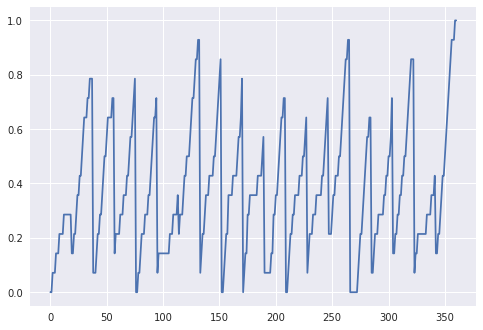

In [385]:
# plt.plot(X)
plt.plot(y)

# [4] Evaluation
### K-fold Cross-Validation

In [386]:
rng = check_random_state(0)

In [388]:
# GB
classifier_GB = GradientBoostingRegressor(n_estimators=1500, # score: 0.94608 (AUC 0.81419), learning_rate=0.001, max_features=8 <<< Best
#                                    loss='deviance',
#                                    subsample=1,
#                                    max_depth=5,
#                                    min_samples_split=20,
                                   learning_rate=0.002,
#                                    max_features=10,
                                   random_state=rng)

In [389]:
# AB
classifier_AB = AdaBoostRegressor(n_estimators=1500, # score: 0.93948 (AUC 0.88339), learning_rate=0.004 <<< Best
                                   learning_rate=0.002,
                                   random_state=rng)

In [390]:
# RF
classifier_RF = RandomForestRegressor(n_estimators=1500, # score: 0.94207 (AUC 0.81870), max_depth=3, min_samples_split=20, <<< Best
#                                     max_features=10,
#                                     max_depth=3,
#                                     min_samples_split=20,
                                    random_state=rng)

In [462]:
# ET
classifier_ET = ExtraTreesRegressor(n_estimators=1000, # score: 0.94655 (AUC 0.84364), max_depth=3, min_samples_split=20, max_features=10 <<< Best
#                                     max_depth=3,
#                                     min_samples_split=20,
#                                     max_features=10,
                                    random_state=rng)

In [463]:
# BG
classifier_BG = BaggingRegressor(n_estimators=500, # score: 0.70725 (AUC 0.63729) <<< Best
#                                     max_features=10,
                                    random_state=rng)

### LR

In [464]:
classifier_LR = LinearRegression() # score: 0.90199 (AUC 0.80569)

### SVM Linear

In [465]:
# classifier_SVCL = svm.SVC(kernel='linear', probability=True, random_state=rng) # score: 0.89976 (AUC 0.70524)
classifier_SVRL = svm.SVR() # score: 0.89976 (AUC 0.70524)

### SVM

In [482]:
classifier_SVCR = svm.SVR(kernel='rbf') # score: 0.80188 (AUC 0.50050)
# classifier_SVRR = svm.SVR(kernel='poly') # score: 0.80188 (AUC 0.50050)

### KNN

In [483]:
classifier_KNN = KNeighborsRegressor(n_neighbors=2) # score: 0.94018 (AUC 0.72792)
cv = cross_val_score(classifier_KNN,
                            X,
                            y,
                            cv=StratifiedKFold(19))
print('KNN CV score: {0:.5f}'.format(cv.mean()))

KNN CV score: 0.92001


/home/user/env_py3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=19.
  % (min_groups, self.n_splits)), Warning)


### Select Model

In [484]:
# classifier = classifier_GB   # 324.632308296
# classifier = classifier_AB   # 429.646733221
# classifier = classifier_RF   # 175.504322802
classifier = classifier_ET   # 172.097916817, 0.0724812030075
# classifier = classifier_BG   # 175.451381872
# classifier = classifier_LR     # 128.465059749, 0.11
# classifier = classifier_SVRL # 3789.82169312
# classifier = classifier_SVRR # 3789.82169312, 0.10754224349

### Split Data

In [485]:
# n_splits=54 # 19 seconds/records for each bidding month
n_splits=19 # 19 seconds/records for each bidding month
n_fold = 8

# X_train_1 = X[0:(len(X)-batch*n_splits)]
# y_train_1 = y[0:(len(X)-batch*n_splits)]

# X_test_1 = X[(len(X)-batch*n_splits):((len(X)-batch*n_splits)+n_splits)]
# y_test_1 = y[(len(X)-batch*n_splits):((len(X)-batch*n_splits)+n_splits)]


### CV

342
323
304
285
266
247
228


/home/user/env_py3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


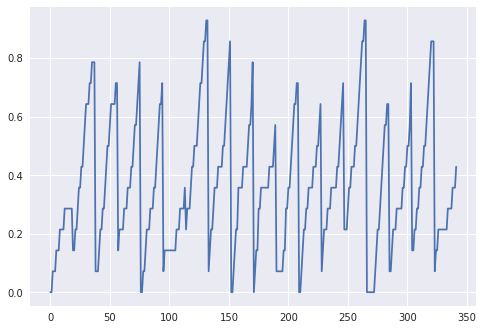

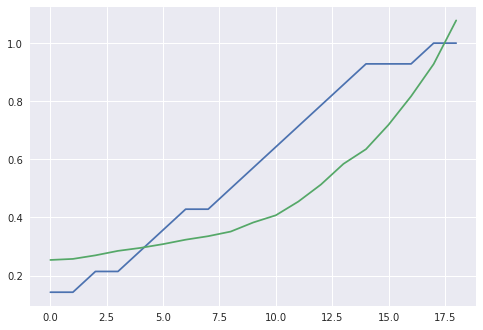

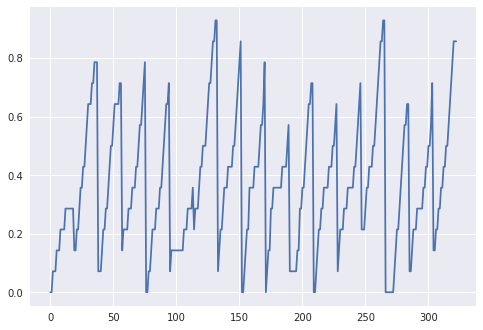

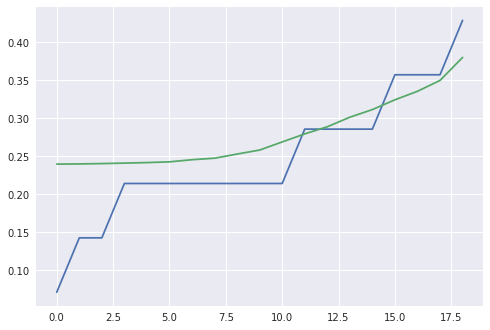

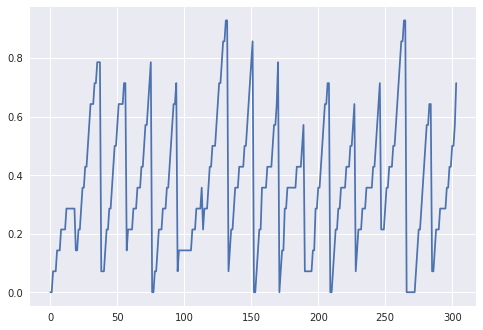

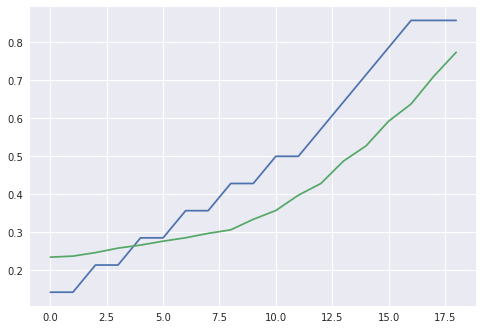

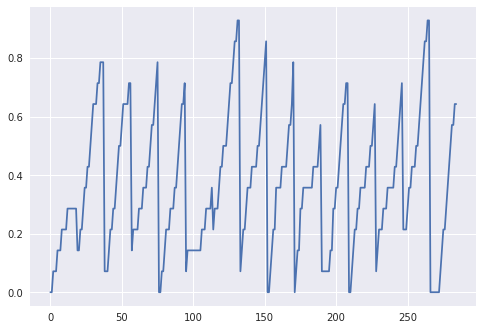

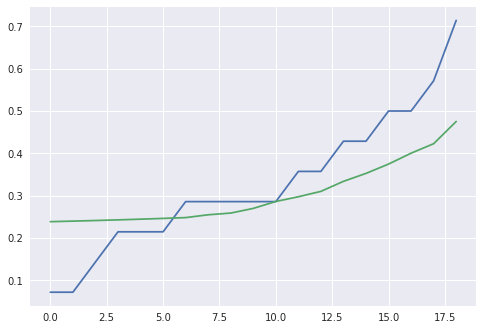

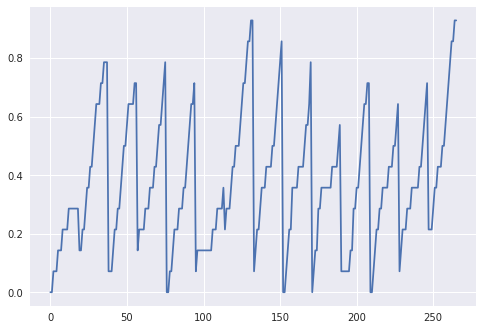

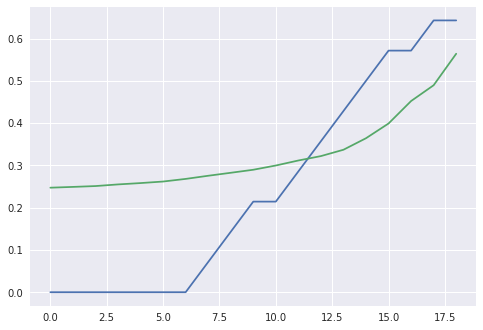

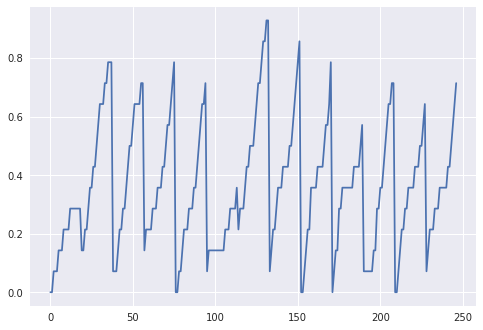

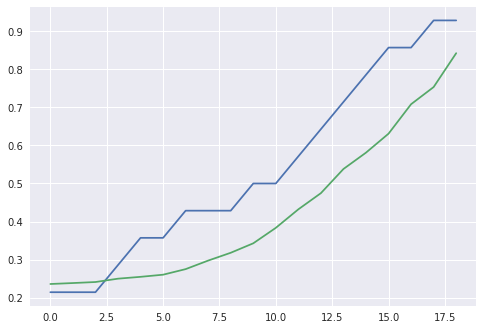

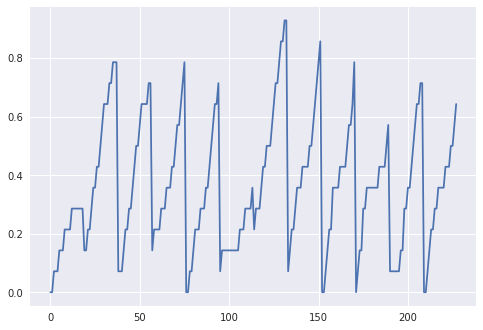

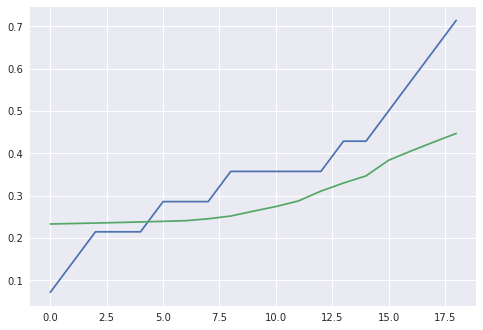

In [486]:
y_pred = {}
y_test = {}

i = 0
for batch in range(1, n_fold):
    X_train_1 = X[0:(len(X)-batch*n_splits)]
    y_train_1 = y[0:(len(X)-batch*n_splits)]
    X_test_1  = X[(len(X)-batch*n_splits):((len(X)-batch*n_splits)+n_splits)]
    y_test_1  = y[(len(X)-batch*n_splits):((len(X)-batch*n_splits)+n_splits)]
    print(len(X_train_1))

    y_pred[i] = classifier.fit(X_train_1, y_train_1).predict(X_test_1)
#     y_pred[i] = classifier.fit(X_train_1, y_train_1).predict(X_test_1[0:10])
#     y_pred[i] = classifier.fit(X_train_1, y_train_1).predict(X_test_1[10:19])
    y_test[i] = y_test_1  
    plt.figure()
    plt.plot(y_train_1)
    plt.plot()
    plt.figure()
    plt.plot(y_test[i])
    plt.plot(y_pred[i])
    plt.plot()
    i += 1

In [487]:
k = []
for i in range(0, len(y_test)):
    k.append(np.mean(np.sqrt(np.square(y_test[i] - y_pred[i]))))

k_mean = np.mean(k)

print(k_mean)
print()
print(k)

0.10754224349

[0.14471460784136542, 0.042566925313432542, 0.10593172006665465, 0.080351130722646671, 0.16351639895750855, 0.1211131630925264, 0.094601758433853642]


In [436]:
y_pred_df = pd.DataFrame.from_dict(y_pred)

In [437]:
y_pred_df.columns=['month 7','month 6','month 5','month 4','month 3','month 2','month 1']

In [367]:
y_pred_df.to_csv('bid_results_v001.csv', index=False)

In [438]:
y_pred_df

,month 7,month 6,month 5,month 4,month 3,month 2,month 1
0,0.178571,0.086286,0.101286,0.098714,0.064571,0.086000,0.078571
1,0.184571,0.127286,0.110143,0.127143,0.075857,0.095714,0.084857
2,0.246571,0.180286,0.191000,0.174571,0.097143,0.107000,0.140571
3,0.282571,0.189571,0.345143,0.174857,0.189286,0.147286,0.133714
4,0.337143,0.193286,0.374571,0.155857,0.231143,0.174571,0.146857
5,0.353429,0.204429,0.405286,0.158286,0.261714,0.199000,0.191571
6,0.404000,0.237000,0.426286,0.162571,0.289143,0.308143,0.195429
7,0.433571,0.239429,0.446571,0.233286,0.302143,0.416714,0.204571
8,0.443714,0.256143,0.452571,0.262714,0.323000,0.485143,0.205143
9,0.512571,0.253143,0.472143,0.311857,0.327143,0.531714,0.243571


---

### The End